## Final Project Submission

Please fill out:
* Student name: IAN MOIRE
* Student pace: FULL TIME
* Scheduled project review date/time: 2025
* Instructor name: VERONICA ISIAHO
* Blog post URL: 


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

# CLICK ON THIS [Link](https://docs.google.com/presentation/d/1QTQx5TiCqaeKmVK-XM7kIZIWwQTywthi9O0e2HIxzHA/edit?usp=sharing) TO ACCESS THE NON-TECHNICAL PRESENTATION.

# PROJECT: 
# Introduction
## Explore the Ames Housing Dataset

# > Use the required libraries

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## > Open the exact file

In [68]:
# Print the first five rows
df = pd.read_csv('/Users/mac/Documents/Flatiron/dsc-pandas-eda-lab/data/ames.csv')
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [69]:
# Get some info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [70]:
# Preview the number of rows and columns
df.shape

(1460, 81)

In [71]:
# To look at the data types of the columns
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

# > Cleaning the Dataset

# 1. Handling missing values

In [72]:
# To check how many misssing values are in the selected columns
columns_to_check = ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',        
   'BsmtExposure',   
   'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
'FireplaceQu',     
   'GarageType',     
   'GarageYrBlt',    
   'GarageFinish',  
 'GarageQual',     
   'GarageCond', 
'PoolQC',        
  'Fence',          
   'MiscFeature']
missing_values = df[columns_to_check].isnull().sum()

# Display missing values in a single cell
missing_summary = ", ".join([f"{col}: {missing_values[col]}" for col in columns_to_check])
print(f"Missing values summary: {missing_summary}")


Missing values summary: LotFrontage: 259, Alley: 1369, MasVnrType: 8, MasVnrArea: 8, BsmtQual: 37, BsmtCond: 37, BsmtExposure: 38, BsmtFinType1: 37, BsmtFinType2: 38, Electrical: 1, FireplaceQu: 690, GarageType: 81, GarageYrBlt: 81, GarageFinish: 81, GarageQual: 81, GarageCond: 81, PoolQC: 1453, Fence: 1179, MiscFeature: 1406


# *The point of determining missing values of the specified columns is to get the ones with high missing values, moderate missing values, and low missing values so that cleaning of dataset can be performed easily.*

In [73]:
# Fill the missing values in the specified columns
impute_values = {'Alley': 'NoAlley', 'PoolQC': 'NoPool', 'Fence': 'NoFence', 'MiscFeature': 'None', 'FireplaceQu': 'NoFireplace'}

df.fillna(value=impute_values, inplace=True)


In [74]:
# Checking if the missing values were handled
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [75]:
# Count the missing values in the specified columns
print(df['Alley'].value_counts())
print(df['PoolQC'].value_counts())
print(df['Fence'].value_counts())
print(df['MiscFeature'].value_counts())
print(df['FireplaceQu'].value_counts())


NoAlley    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
NoPool    1453
Gd           3
Ex           2
Fa           2
Name: PoolQC, dtype: int64
NoFence    1179
MnPrv       157
GdPrv        59
GdWo         54
MnWw         11
Name: Fence, dtype: int64
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
NoFireplace    690
Gd             380
TA             313
Fa              33
Ex              24
Po              20
Name: FireplaceQu, dtype: int64


# *Measures of Central Tendency(Mean and Median) are performed to replace the null values in the column names.*

In [76]:
# Calculate the median value of the LotFrontage column
lot_frontage_median = df['LotFrontage'].median()

# Fill missing values in LotFrontage with the median
df['LotFrontage'].fillna(lot_frontage_median, inplace=True)

print(f"Median value used for LotFrontage imputation: {lot_frontage_median}")
# This should print 0 if all missing values are filled
print(df['LotFrontage'].isnull().sum())


Median value used for LotFrontage imputation: 69.0
0


In [77]:
# Impute GarageType with "NoGarage"
df['GarageType'].fillna('NoGarage', inplace=True)

# Impute GarageYrBlt with the median year
garage_year_median = df['GarageYrBlt'].median()
df['GarageYrBlt'].fillna(garage_year_median, inplace=True)

# Impute other garage-related categorical columns with "NoGarage"
df['GarageFinish'].fillna('NoGarage', inplace=True)
df['GarageQual'].fillna('NoGarage', inplace=True)
df['GarageCond'].fillna('NoGarage', inplace=True)

print(f"Median value used for GarageYrBlt imputation: {garage_year_median}")
# This should print 0 if all missing values are filled
print(df[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].isnull().sum())  


Median value used for GarageYrBlt imputation: 1980.0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64


# *Mode is used here due to the Electrical column having one missing value.*

In [78]:
# Impute MasVnrType with "None"
df['MasVnrType'].fillna('None', inplace=True)

# Impute MasVnrArea with 0
df['MasVnrArea'].fillna(0, inplace=True)

# Impute Basement columns with "NoBasement"
basement_columns = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for col in basement_columns:
    df[col].fillna('NoBasement', inplace=True)

# Impute Electrical with the mode
electrical_mode = df['Electrical'].mode()[0]
df['Electrical'].fillna(electrical_mode, inplace=True)

# Verify the imputations
print(df[['MasVnrType', 'MasVnrArea'] + basement_columns + ['Electrical']].isnull().sum())  # All should print 0


MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
dtype: int64


# *Rechecking if there are any missing values in the dataset.*

In [79]:
# Determine the summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
# Preview the first 5 rows
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NoAlley,Reg,Lvl,AllPub,...,0,NoPool,NoFence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NoAlley,IR1,Lvl,AllPub,...,0,NoPool,NoFence,None,0,12,2008,WD,Normal,250000


# 2. Handling duplicates

In [81]:
# Check for duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display duplicate rows (if any)
if num_duplicates > 0:
    print(df[duplicates])

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify that duplicates have been removed
print(f"Number of rows after removing duplicates: {len(df)}")


Number of duplicate rows: 0
Number of rows after removing duplicates: 1460


# NOTE: *Interesting to say that there are no duplicates in the data frame.*

# Explore Data Distribution

In [82]:
# Get the statistics summary of the dataset
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# The histograms below will show the distributions of:
* SalePrice 
* TotRmsAbvGrd
* Overallcond

# (a) SalePrice 

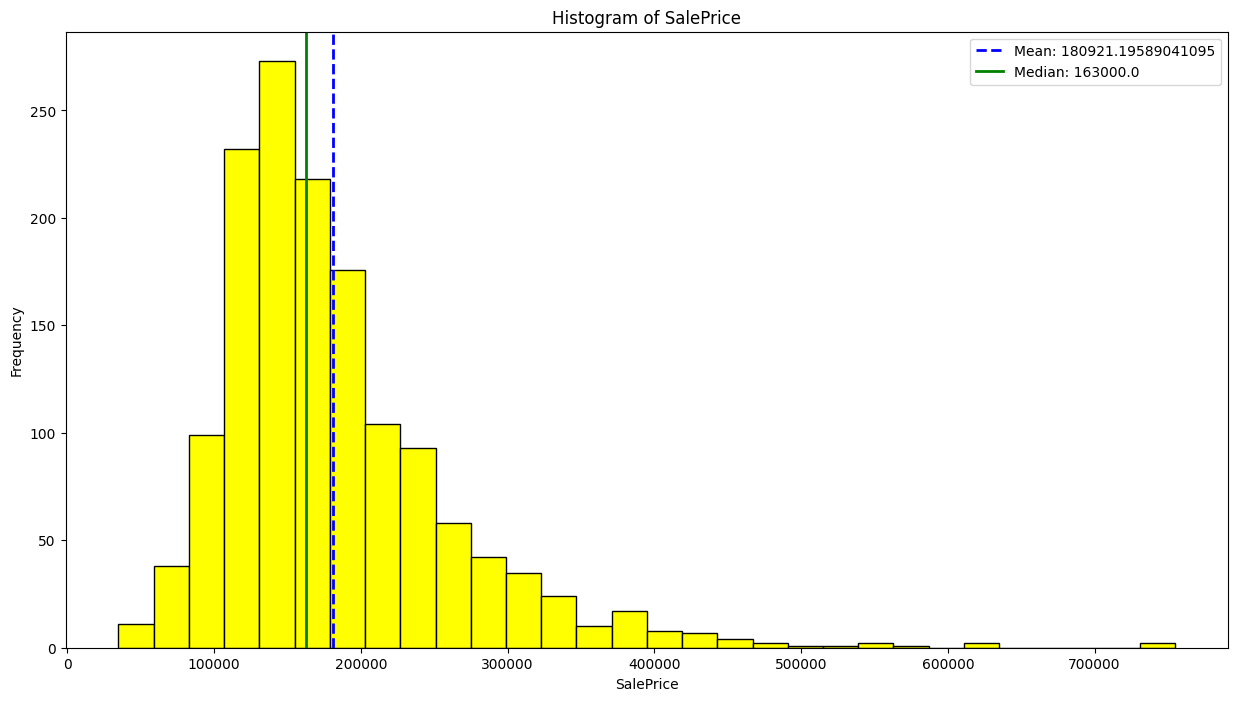

In [84]:
# Plot a histogram of the SalePrice Distribution
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['SalePrice'], bins=30, color='yellow', edgecolor='black')

mean_value = df['SalePrice'].mean()
ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
median_value = df['SalePrice'].median()
ax.axvline(median_value, color='green', linestyle='-', linewidth=2, label=f'Median: {median_value}')

ax.set_title('Histogram of SalePrice')
ax.set_xlabel('SalePrice')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

### EXPLANATION

**The histogram appears to be indicating that most housing properties have sale prices in the lower range, with fewer housing properties having very high prices.
The mean and median suggests that the distribution is skewed to the right, likely due to a few high-priced properties.**

# (b) Total Rooms Above Grade (TotRmsAbvGrd)

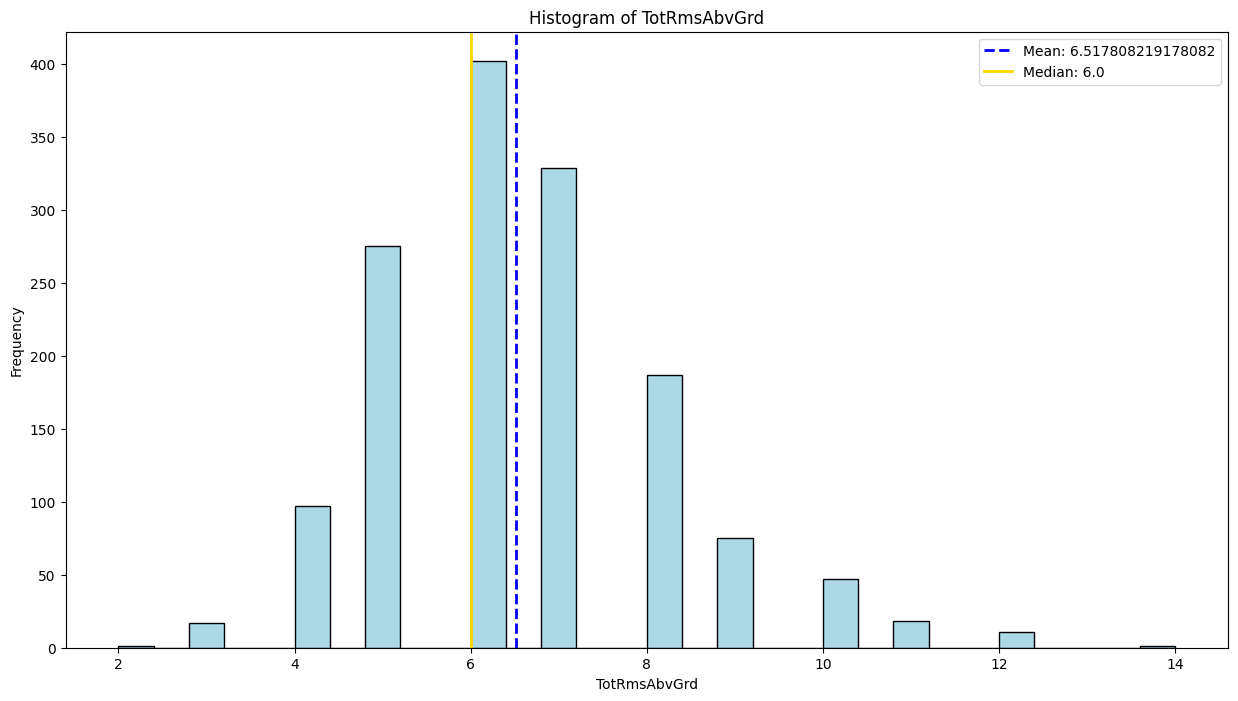

In [85]:
# Plot a histogram of the Total Rooms Above Grade Distribution
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['TotRmsAbvGrd'], bins=30, color='lightblue', edgecolor='black')

mean_value = df['TotRmsAbvGrd'].mean()
ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
median_value = df['TotRmsAbvGrd'].median()
ax.axvline(median_value, color='gold', linestyle='-', linewidth=2, label=f'Median: {median_value}')

ax.set_title('Histogram of TotRmsAbvGrd')
ax.set_xlabel('TotRmsAbvGrd')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

### EXPLANATION

**The Histogram Distribution appears to be indicating that most housing properties have a lower number of rooms, with fewer housing properties having a higher number of rooms. The mean and median suggests that the distribution is skewed to the right, due to a few housing properties with a large number of rooms influencing the mean.**

# (c) Overall Condition (OverallCond)

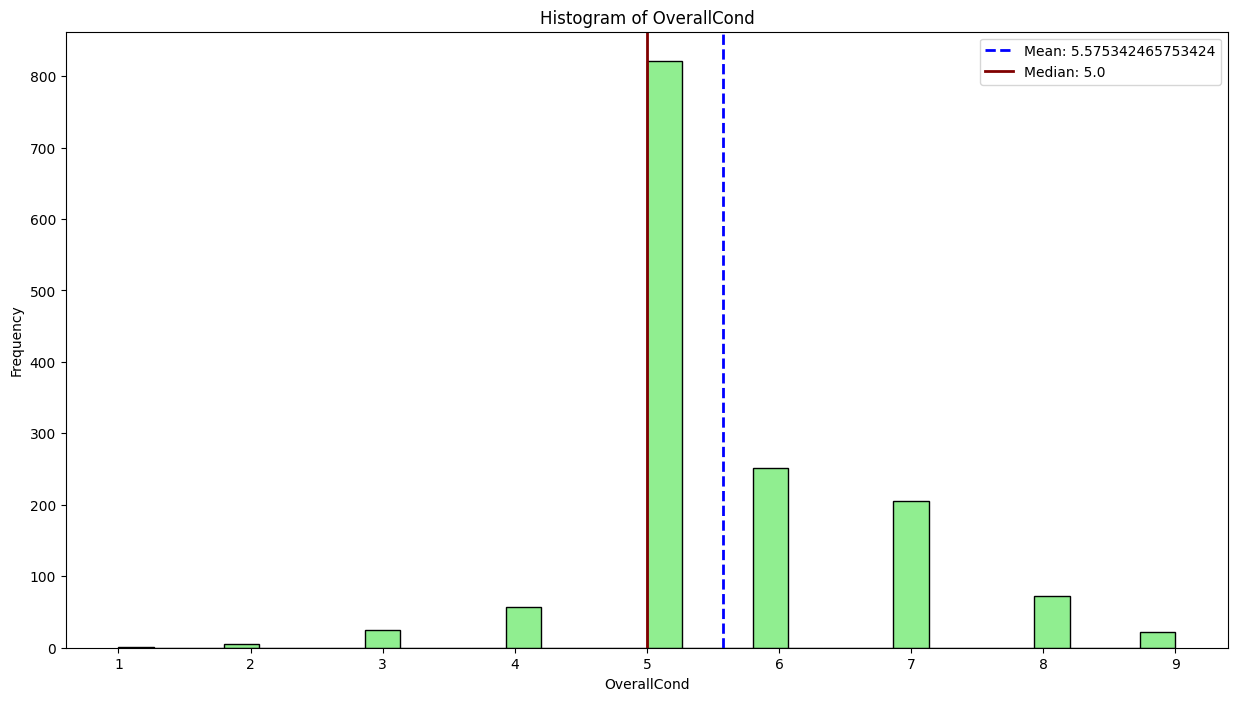

In [86]:
# Plot a histogram of the Overall Condition Distribution
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(df['OverallCond'], bins=30, color='lightgreen', edgecolor='black')

mean_value = df['OverallCond'].mean()
ax.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value}')
median_value = df['OverallCond'].median()
ax.axvline(median_value, color='maroon', linestyle='-', linewidth=2, label=f'Median: {median_value}')

ax.set_title('Histogram of OverallCond')
ax.set_xlabel('OverallCond')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

### EXPLANATION

**The Histogram Distribution appears to be indicating that most housing properties have higher condition ratings, with fewer housing properties having lower ratings. The mean and median suggests that the distribution is skewed to the left, likely due to a higher number of housing properties with better overall conditions influencing the mean.**

# Explore Differences Between Subsets

## The histograms below have been plotted according to each subset, which include:
* Above Average Condition
* Average Condition
* Below Average Condition

In [87]:
# Create subset based on OverallCond
above_average_condition = df[df['OverallCond'] > 5]
print(f"Above average condition: {len(above_average_condition)} rows")

Above average condition: 551 rows


In [21]:
# Create subset based on OverallCond
average_condition = df[df['OverallCond'] == 5]
print(f"Average condition: {len(average_condition)} rows")

Average condition: 821 rows


In [88]:
# Create subset based on OverallCond
below_average_condition = df[df['OverallCond'] < 5]
# Verify the number of rows in each subset
print(f"Below average condition: {len(below_average_condition)} rows")

Below average condition: 88 rows


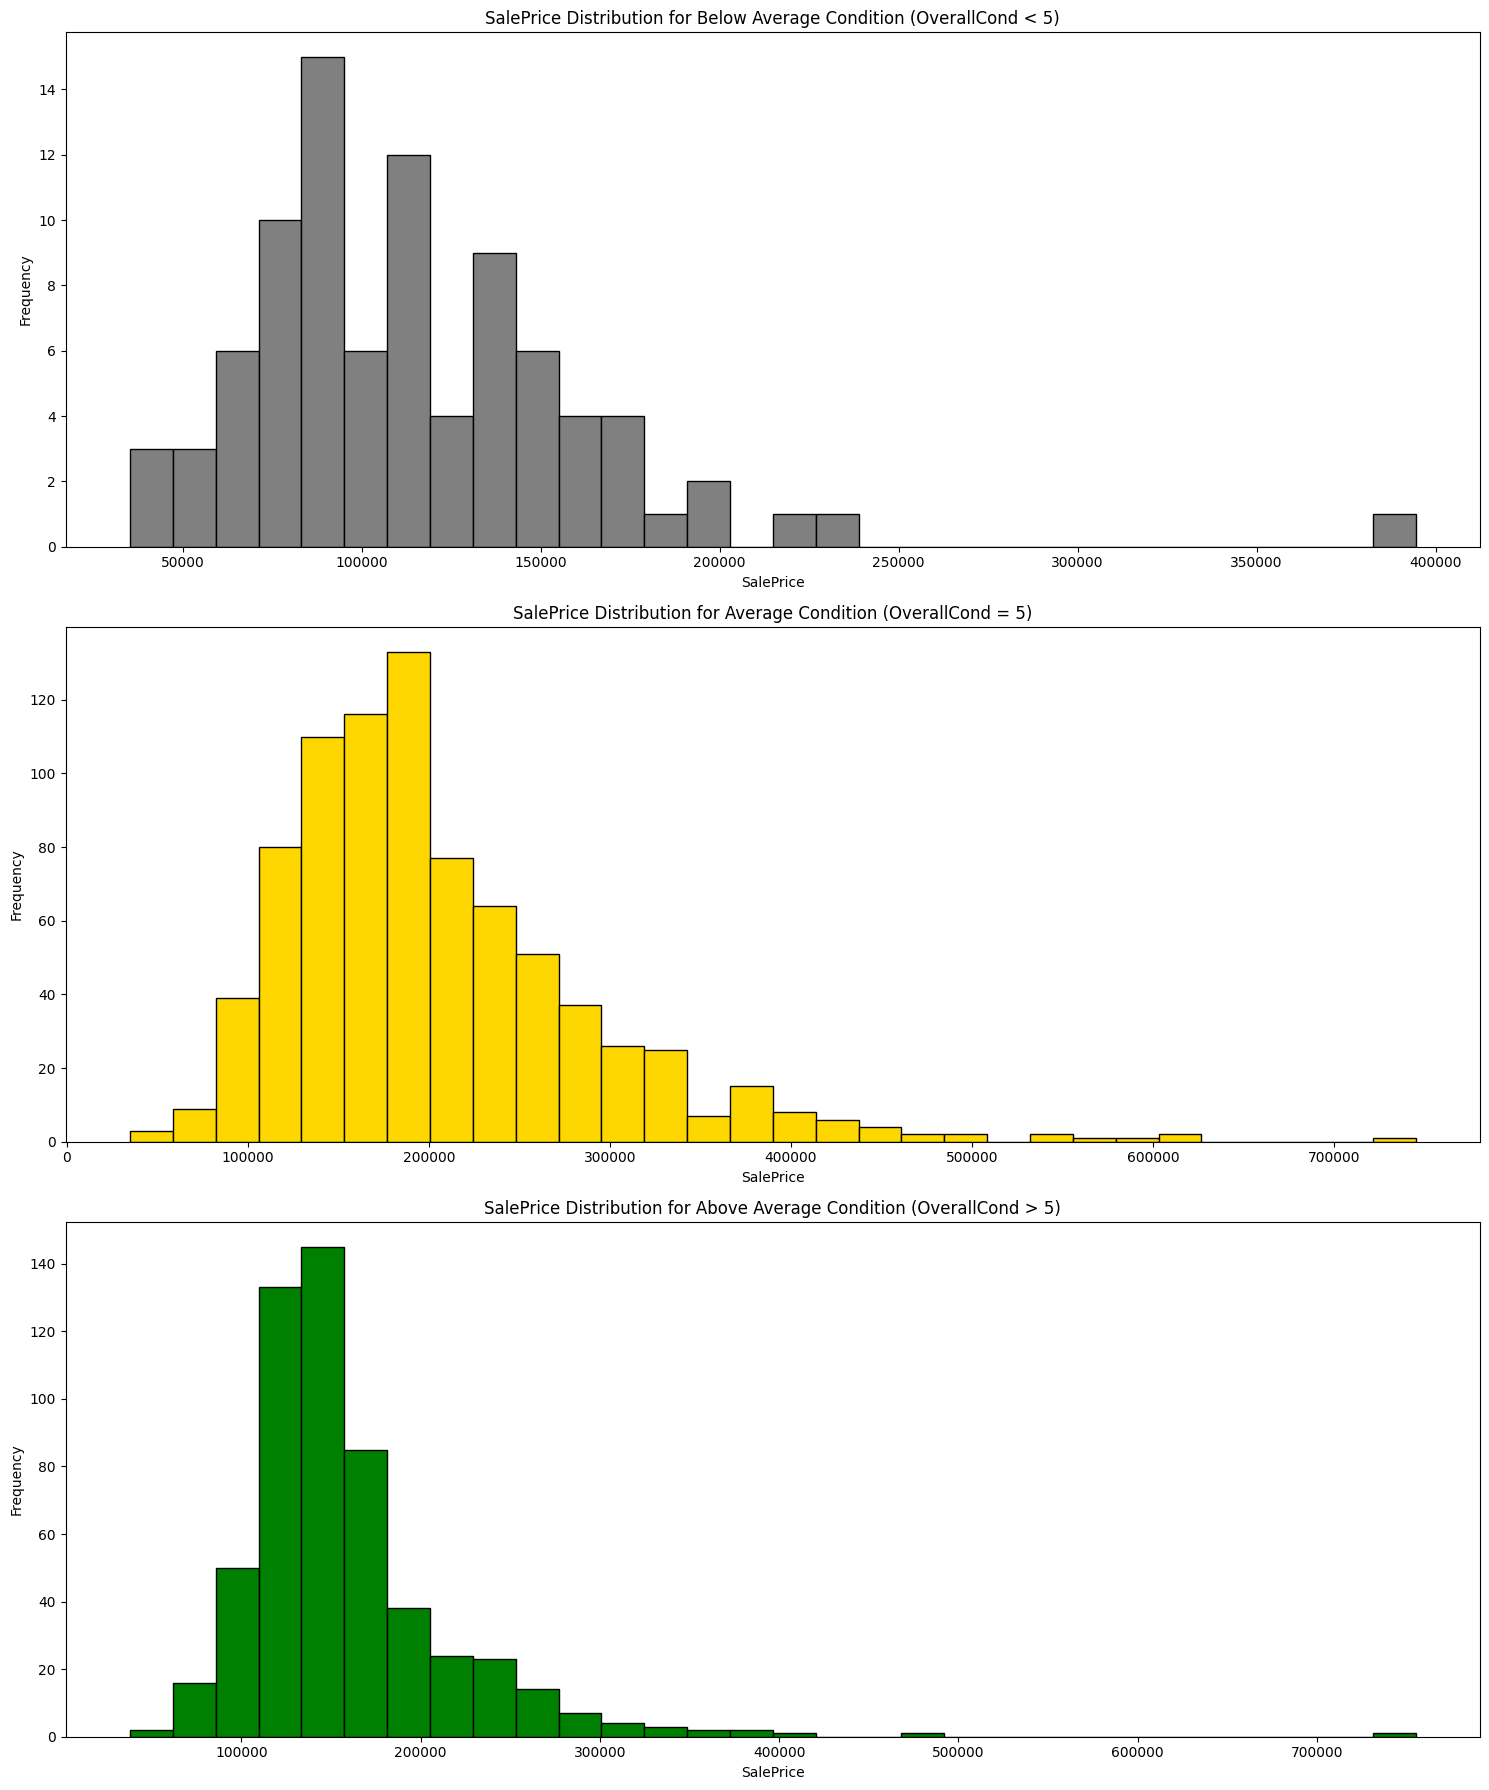

In [24]:
# Plot histograms of SalePrice for each subset
fig, ax = plt.subplots(3, 1, figsize=(15, 18))

# Below average condition
ax[0].hist(below_average_condition['SalePrice'], bins=30, color='grey', edgecolor='black')
ax[0].set_title('SalePrice Distribution for Below Average Condition (OverallCond < 5)')
ax[0].set_xlabel('SalePrice')
ax[0].set_ylabel('Frequency')

# Average condition
ax[1].hist(average_condition['SalePrice'], bins=30, color='gold', edgecolor='black')
ax[1].set_title('SalePrice Distribution for Average Condition (OverallCond = 5)')
ax[1].set_xlabel('SalePrice')
ax[1].set_ylabel('Frequency')

# Above average condition
ax[2].hist(above_average_condition['SalePrice'], bins=30, color='green', edgecolor='black')
ax[2].set_title('SalePrice Distribution for Above Average Condition (OverallCond > 5)')
ax[2].set_xlabel('SalePrice')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### EXPLANATION

**It seems from the above histogram subsets (above average condition, average condition and below average condition), the houses with better overall condition tend to sell for higher prices, showing the importance of maintaining good housing property condition for maximizing sale value.**

# Explore Correlations

# > Identify the most positive correlated feature

In [89]:
# Calculate the Pearson correlation matrix
correlation_matrix = df.corr(numeric_only=True)

In [90]:
# Exclude SalePrice itself
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest positive correlation with SalePrice
most_correlated_column = saleprice_correlations.idxmax()
highest_correlation = saleprice_correlations.max()

# Print the result
print(f"The column most positively correlated with SalePrice is '{most_correlated_column}' with a correlation coefficient of {highest_correlation:.2f}.")


The column most positively correlated with SalePrice is 'OverallQual' with a correlation coefficient of 0.79.


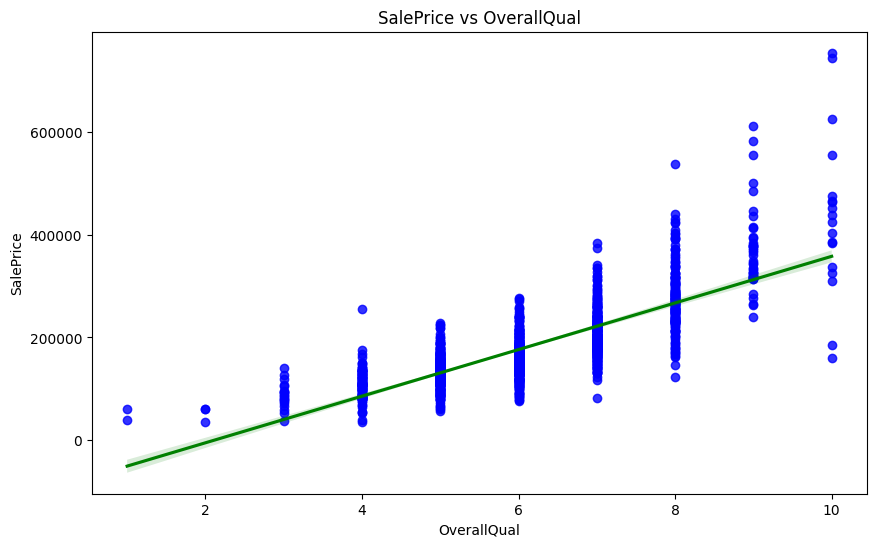

In [91]:
# Scatter plot with regression line for SalePrice vs OverallQual
plt.figure(figsize=(10, 6))
sns.regplot(x='OverallQual', y='SalePrice', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'green'})
plt.title('SalePrice vs OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.show()


# Explanation
* A correlation coefficient of 0.79 indicates a strong positive relationship between overall quality and sale price. This means that as the overall quality of a house increases, its sale price tends to increase significantly."

# > Identify the most negative correlated feature

In [92]:
# Exclude SalePrice itself
saleprice_correlations = correlation_matrix['SalePrice'].drop('SalePrice')

# Find the column with the highest negative correlation with SalePrice
most_negatively_correlated_column = saleprice_correlations.idxmin()
lowest_correlation = saleprice_correlations.min()

# Print the result
print(f"The column most negatively correlated with SalePrice is '{most_negatively_correlated_column}' with a correlation coefficient of {lowest_correlation:.2f}.")


The column most negatively correlated with SalePrice is 'KitchenAbvGr' with a correlation coefficient of -0.14.


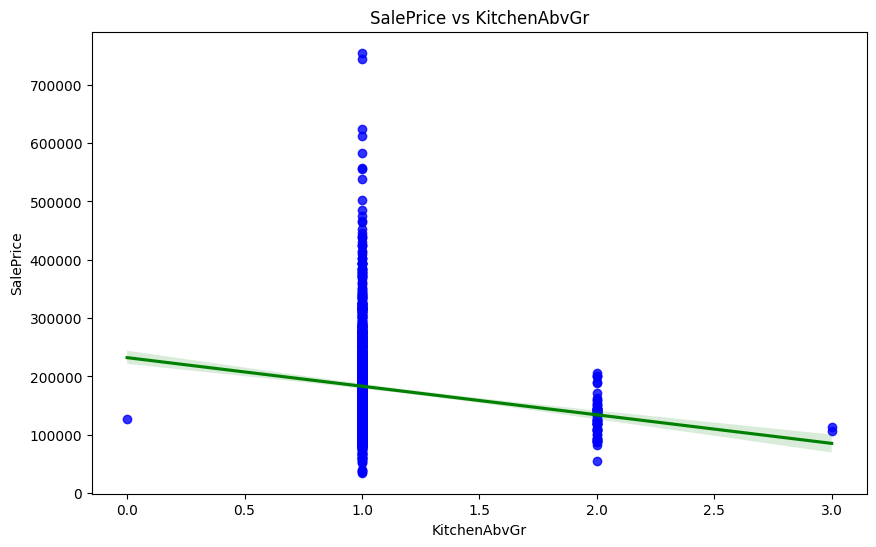

In [93]:
# Scatter plot with regression line for SalePrice vs KitchenAbvGr
plt.figure(figsize=(10, 6))
sns.regplot(x='KitchenAbvGr', y='SalePrice', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'green'})
plt.title('SalePrice vs KitchenAbvGr')
plt.xlabel('KitchenAbvGr')
plt.ylabel('SalePrice')
plt.show()


# Explanation
* A negative correlation of -0.14 suggests that houses with more kitchens above grade('KitchenAbvGr') may have lower sale prices on average. 

# Determining the outliers

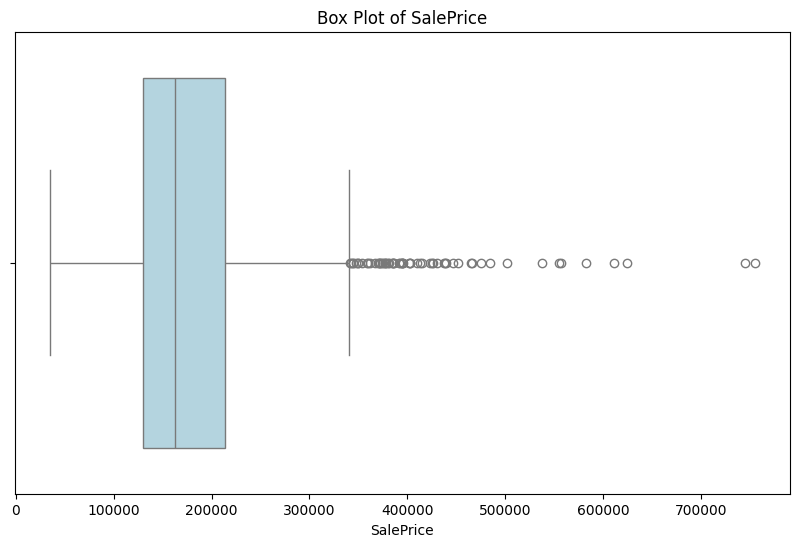

In [94]:
# Box plot for SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'], color='lightblue')
plt.title('Box Plot of SalePrice')
plt.xlabel('SalePrice')
plt.show()

In [41]:
# Calculate Q1, Q3, and IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(f"Number of detected outliers: {len(outliers)}")


Number of detected outliers: 61


In [95]:
# Display the first few outliers
print(outliers.head())

      Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
11    12          60       RL         85.0    11924   Pave  NoAlley      IR1   
53    54          20       RL         68.0    50271   Pave  NoAlley      IR1   
58    59          60       RL         66.0    13682   Pave  NoAlley      IR2   
112  113          60       RL         77.0     9965   Pave  NoAlley      Reg   
151  152          20       RL        107.0    13891   Pave  NoAlley      Reg   

    LandContour Utilities  ... PoolArea  PoolQC    Fence MiscFeature MiscVal  \
11          Lvl    AllPub  ...        0  NoPool  NoFence        None       0   
53          Low    AllPub  ...        0  NoPool  NoFence        None       0   
58          HLS    AllPub  ...        0  NoPool  NoFence        None       0   
112         Lvl    AllPub  ...        0  NoPool  NoFence        None       0   
151         Lvl    AllPub  ...        0  NoPool  NoFence        None       0   

    MoSold YrSold  SaleType  SaleCondi

In [96]:
# Identify high-priced outliers
high_priced_outliers = outliers.sort_values(by='SalePrice', ascending=False).head(5)

# Display details of high-priced outliers
print(high_priced_outliers[['MSSubClass', 'SalePrice', 'OverallQual', 'LotArea', 'YearBuilt', 'Neighborhood']])

      MSSubClass  SalePrice  OverallQual  LotArea  YearBuilt Neighborhood
691           60     755000           10    21535       1994      NoRidge
1182          60     745000           10    15623       1996      NoRidge
1169          60     625000           10    35760       1995      NoRidge
898           20     611657            9    12919       2009      NridgHt
803           60     582933            9    13891       2008      NridgHt


# NOTE: 
* According to the outliers discovered, they seem valid and do not cause errors. It would be appropriate for me to keep them in the dataset.

# Engineer and Explore a New Feature

# > Age

In [97]:
# Create Age feature
df['Age'] = df['YrSold'] - df['YearBuilt']

# Display the first few rows to verify the new feature
print(df[['YearBuilt', 'YrSold', 'Age']].head())

   YearBuilt  YrSold  Age
0       2003    2008    5
1       1976    2007   31
2       2001    2008    7
3       1915    2006   91
4       2000    2008    8


**The below histogram is to understand the distribution of the Age feature.**

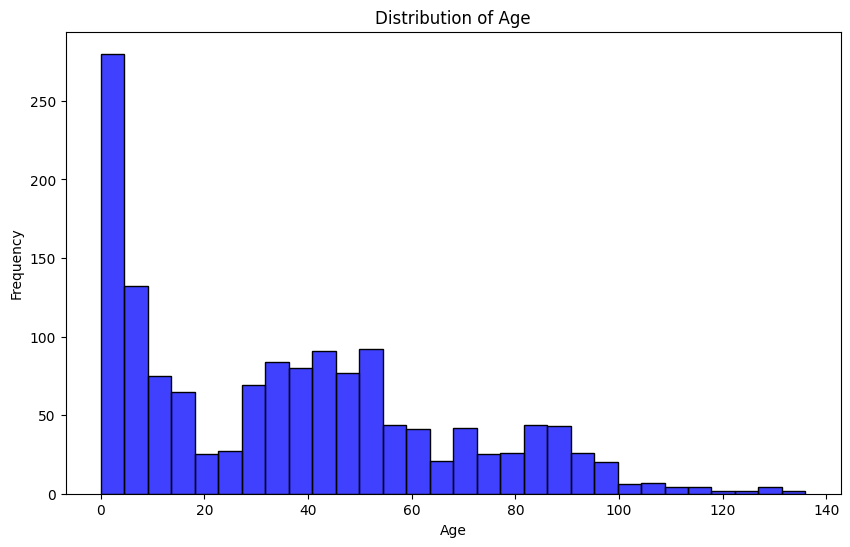

In [98]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**The below histogram is to visualize the relationship between Age and SalePrice.**

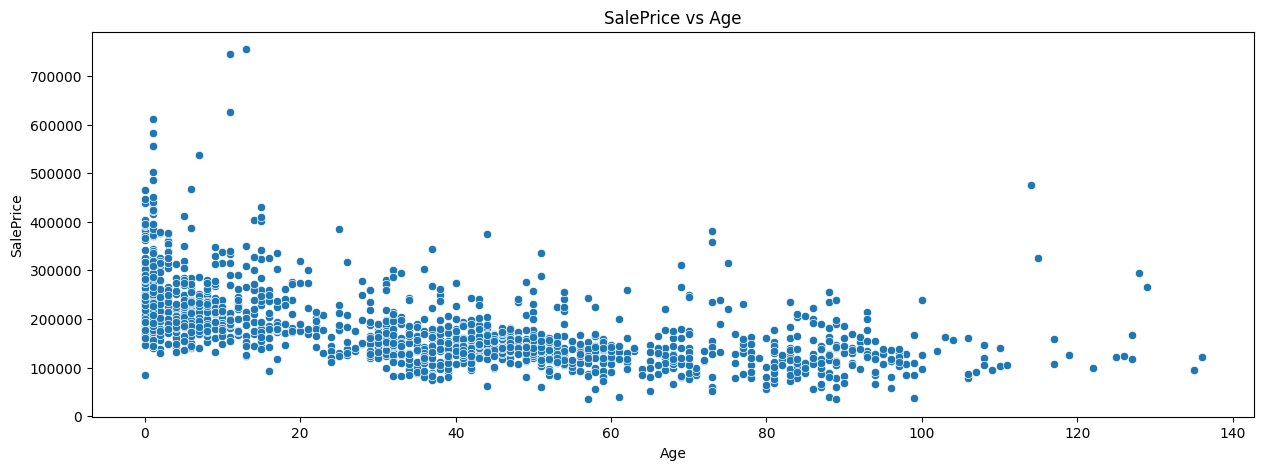

In [99]:
# Scatter plot of SalePrice vs Age
plt.figure(figsize=(15, 5))
sns.scatterplot(x='Age', y='SalePrice', data=df)
plt.title('SalePrice vs Age')
plt.xlabel('Age')
plt.ylabel('SalePrice')
plt.show()

## Explanation

**According to the scatterplot that has been created, it is discovered that newer houses tend to have higher prices,
but as the houses continue to age more, the selling price falls.**

# **OPTIONAL: For learning purposes**
# > Veranda_Volume

In [100]:
# Create Veranda_Volume feature
df['Veranda_Volume'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']

# Display the first few rows to verify the new feature
print(df[['OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Veranda_Volume']].head())

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  Veranda_Volume
0           61              0          0            0              61
1            0              0          0            0               0
2           42              0          0            0              42
3           35            272          0            0             307
4           84              0          0            0              84


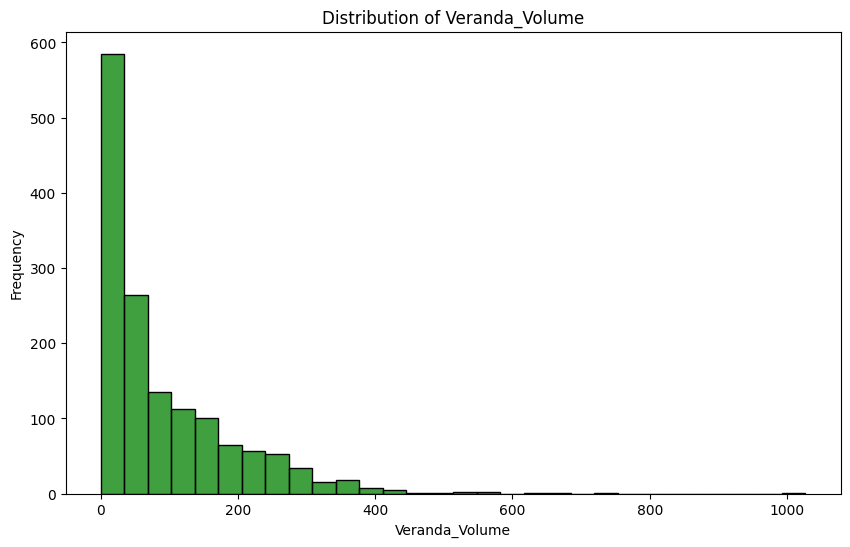

In [101]:
# Histogram of Veranda_Volume
plt.figure(figsize=(10, 6))
sns.histplot(df['Veranda_Volume'], bins=30, color='green')
plt.title('Distribution of Veranda_Volume')
plt.xlabel('Veranda_Volume')
plt.ylabel('Frequency')
plt.show()

# Conclusion

**The analysis successfully identified key features influencing home sale prices and built predictive models with good performance.**